In [225]:
import numpy as np 
import pandas as pd
import collections # counter
import matplotlib.pyplot as plt
import seaborn as sns
from copy import *
from statistics import mean

from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.utils import column_or_1d
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.feature_selection import VarianceThreshold

import graphviz 
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG
from sklearn import tree

In [226]:
folder = 'csv_he'
# folder = 'csv_pp_500'
# folder = 'csv_b_500'
# selection_method = 1
selection_method = 2

In [227]:
pd.options.display.max_columns = None
# cv = False 
cv = True
k = 5

# train/test set size (%)
if cv == False:
    test_size = 0.20
    k = 1

In [228]:
# Load data
X_train, X_test, y_train, y_test = list(), list(), list(), list()
for i in range(k):
    X_train.append(pd.read_csv(folder + '/train_data_' + str(selection_method) + '_cv_' + str(cv) + '_' + str(i) + '.csv'))
    X_test.append(pd.read_csv(folder + '/test_data_' + str(selection_method) + '_cv_' + str(cv) + '_' + str(i) + '.csv'))
    y_train.append(pd.read_csv(folder + '/train_label_' + str(selection_method) + '_cv_' + str(cv) + '_' + str(i) + '.csv'))
    y_test.append(pd.read_csv(folder + '/test_label_' + str(selection_method) + '_cv_' + str(cv) + '_' + str(i) + '.csv'))

    y_train[i] = column_or_1d(y_train[i]['repeat_buyer'], warn=True)
    y_test[i] = column_or_1d(y_test[i]['repeat_buyer'], warn=True)

In [229]:
# choose one attributes set - default = all attributes
# generic
# attributes = ['n_input_buy', 'n_input_no_buy', 'n_click_buy', 'n_click_no_buy', 'n_mouse_click_buy', 'n_mouse_click_no_buy',
#                 'n_mouse_move_buy', 'n_mouse_move_no_buy', 'n_scroll_move_buy', 'n_scroll_move_no_buy', 
#                 'n_scrandom_buy', 'n_scrandom_no_buy', 'n_filter_buy', 'n_filter_no_buy', 'n_search_buy', 'n_search_no_buy',
#                 'n_events_buy', 'n_events_no_buy', 'n_pageviews_buy', 'n_pageviews_no_buy']

# e-commerce interaction
# attributes = ['n_add_to_cart_buy', 'n_add_to_cart_no_buy', 'n_cart_buy', 'n_cart_no_buy', 
#                 'n_top_product_u', 'n_unique_product_u', 'n_top_category_u', 'n_unique_category_u',
#                 'n_product_buy', 'n_product_no_buy', 'n_non_product_buy', 'n_non_product_no_buy', 
#                 'n_category_buy', 'n_category_no_buy', 
#                 'referrer1_-', 'referrer1_azet', 'referrer1_facebook', 'referrer1_google', 
#                 'referrer1_instagram']


# noninteraction
# attributes = ['time_1', 'time_2', 'time_3', 'day_1', 'day_2', 'load_time_buy', 'load_time_no_buy',
#                 'effective_duration_buy', 'effective_duration_no_buy', 'user_mean_eff_duration',
#                 'pv_product_mean_eff_duration_no_buy', 'pv_product_mean_eff_duration_buy', 
#                 'n_sessions', 'mean_price', 'device.type_desktop', 'device.type_mobile', 'device.type_tablet', 
#                 'browser.name_-', 'browser.name_Chrome', 'browser.name_Edge', 'browser.name_Facebook', 
#                 'browser.name_Firefox', 'browser.name_MIUI Browser', 'browser.name_Opera', 'browser.name_Safari', 
#                 'os.name_Android', 'os.name_Linux', 'os.name_Windows', 'os.name_iOS',
#                 'country_AT', 'country_CZ', 'country_SK', 'country_HU', 
#                 'city_type_0', 'city_type_1', 'city_type_2', 'city_type_3', 'continent_EU']


# N + IG
# attributes = ['time_1', 'time_2', 'time_3', 'day_1', 'day_2', 'load_time_buy', 'load_time_no_buy',
#                 'effective_duration_buy', 'effective_duration_no_buy', 'user_mean_eff_duration',
#                 'pv_product_mean_eff_duration_no_buy', 'pv_product_mean_eff_duration_buy', 
#                 'n_sessions', 'mean_price', 'device.type_desktop', 'device.type_mobile', 'device.type_tablet', 
#                 'browser.name_-', 'browser.name_Chrome', 'browser.name_Edge', 'browser.name_Facebook', 
#                 'browser.name_Firefox', 'browser.name_MIUI Browser', 'browser.name_Opera', 'browser.name_Safari', 
#                 'os.name_Android', 'os.name_Linux', 'os.name_Windows', 'os.name_iOS',
#                 'country_AT', 'country_CZ', 'country_SK', 'country_HU', 
#                 'city_type_0', 'city_type_1', 'city_type_2', 'city_type_3', 'continent_EU',
#                 'n_input_buy', 'n_input_no_buy', 'n_click_buy', 'n_click_no_buy', 'n_mouse_click_buy', 'n_mouse_click_no_buy',
#                 'n_mouse_move_buy', 'n_mouse_move_no_buy', 'n_scroll_move_buy', 'n_scroll_move_no_buy', 
#                 'n_scrandom_buy', 'n_scrandom_no_buy', 'n_filter_buy', 'n_filter_no_buy', 'n_search_buy', 'n_search_no_buy',
#                 'n_events_buy', 'n_events_no_buy', 'n_pageviews_buy', 'n_pageviews_no_buy']

# N + IE
# attributes = ['time_1', 'time_2', 'time_3', 'day_1', 'day_2', 'load_time_buy', 'load_time_no_buy',
#                 'effective_duration_buy', 'effective_duration_no_buy', 'user_mean_eff_duration',
#                 'pv_product_mean_eff_duration_no_buy', 'pv_product_mean_eff_duration_buy', 
#                 'n_sessions', 'mean_price', 'device.type_desktop', 'device.type_mobile', 'device.type_tablet', 
#                 'browser.name_-', 'browser.name_Chrome', 'browser.name_Edge', 'browser.name_Facebook', 
#                 'browser.name_Firefox', 'browser.name_MIUI Browser', 'browser.name_Opera', 'browser.name_Safari', 
#                 'os.name_Android', 'os.name_Linux', 'os.name_Windows', 'os.name_iOS',
#                 'country_AT', 'country_CZ', 'country_SK', 'country_HU', 
#                 'city_type_0', 'city_type_1', 'city_type_2', 'city_type_3', 'continent_EU',
#                 'n_add_to_cart_buy', 'n_add_to_cart_no_buy', 'n_cart_buy', 'n_cart_no_buy', 
#                 'n_top_product_u', 'n_unique_product_u', 'n_top_category_u', 'n_unique_category_u',
#                 'n_product_buy', 'n_product_no_buy', 'n_non_product_buy', 'n_non_product_no_buy', 
#                 'n_category_buy', 'n_category_no_buy', 
#                 'referrer1_-', 'referrer1_azet', 'referrer1_facebook', 'referrer1_google', 
#                 'referrer1_instagram']

# IG + IE
# attributes = ['n_input_buy', 'n_input_no_buy', 'n_click_buy', 'n_click_no_buy', 'n_mouse_click_buy', 'n_mouse_click_no_buy',
#                 'n_mouse_move_buy', 'n_mouse_move_no_buy', 'n_scroll_move_buy', 'n_scroll_move_no_buy', 
#                 'n_scrandom_buy', 'n_scrandom_no_buy', 'n_filter_buy', 'n_filter_no_buy', 'n_search_buy', 'n_search_no_buy',
#                 'n_events_buy', 'n_events_no_buy', 'n_pageviews_buy', 'n_pageviews_no_buy',
#                 'n_add_to_cart_buy', 'n_add_to_cart_no_buy', 'n_cart_buy', 'n_cart_no_buy', 
#                 'n_top_product_u', 'n_unique_product_u', 'n_top_category_u', 'n_unique_category_u',
#                 'n_product_buy', 'n_product_no_buy', 'n_non_product_buy', 'n_non_product_no_buy', 
#                 'n_category_buy', 'n_category_no_buy', 
#                 'referrer1_-', 'referrer1_azet', 'referrer1_facebook', 'referrer1_google', 
#                 'referrer1_instagram']

In [230]:
# for i in range(k):
#     X_train[i] = X_train[i][X_train[i].columns & attributes]
#     X_test[i] = X_test[i][X_test[i].columns & attributes]

In [231]:
results = []
for i in range(1, X_train[0].shape[1] + 1):  
    row = {'model_complexity': i}

    clf = DecisionTreeClassifier(max_depth = i)
    pred = clf.fit(X_train[0], y_train[0]).predict(X_train[0]) 
    row['train'] = 1-accuracy_score(y_train[0], pred) # train error
    
    pred = clf.predict(X_test[0])
    row['test'] = 1-accuracy_score(y_test[0], pred) # test error
    results.append(row)    

complexity_df = pd.DataFrame(results)
complexity_df.head()

,model_complexity,train,test
0,1,0.266440,0.22500
1,2,0.198413,0.25625
2,3,0.158730,0.20625
3,4,0.112245,0.23750
4,5,0.088435,0.21875


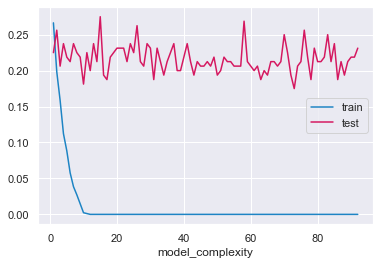

In [232]:
colors = ["#1D84C4", "#D51860", "#FACE63"]
sns.set(style="darkgrid")
sns.set_palette(sns.color_palette(colors))
complexity_df.plot(x='model_complexity')

In [233]:
X_train[0].columns

Index(['country_-', 'country_AT', 'country_CH', 'country_CZ', 'country_DE',
       'country_HU', 'country_IT', 'country_NL', 'country_SK', 'city_type_0',
       'city_type_1', 'city_type_2', 'city_type_3', 'continent_-',
       'continent_EU', 'device.type_desktop', 'device.type_mobile',
       'device.type_tablet', 'browser.name_-', 'browser.name_Chrome',
       'browser.name_Edge', 'browser.name_Facebook', 'browser.name_Firefox',
       'browser.name_MIUI Browser', 'browser.name_Opera',
       'browser.name_Safari', 'os.name_Android', 'os.name_Linux',
       'os.name_Windows', 'os.name_iOS', 'referrer1_-', 'referrer1_azet',
       'referrer1_bing', 'referrer1_facebook', 'referrer1_google',
       'referrer1_herbatica', 'referrer1_heureka', 'referrer1_instagram',
       'referrer1_nasezdravie', 'n_pageviews_buy', 'n_pageviews_no_buy',
       'n_input_buy', 'n_input_no_buy', 'n_click_buy', 'n_click_no_buy',
       'n_mouse_click_buy', 'n_mouse_click_no_buy', 'n_mouse_move_buy',
       

In [234]:
classifiers = [
    DecisionTreeClassifier(),
#     DecisionTreeClassifier(max_depth=3),
#     DecisionTreeClassifier(max_depth=6),

    RandomForestClassifier(),
#     RandomForestClassifier(max_depth=3),
#     RandomForestClassifier(max_depth=6),

    GradientBoostingClassifier(),
    GradientBoostingClassifier(learning_rate=0.5, n_estimators=200, max_depth=3, min_samples_split=5, min_samples_leaf=10),

#     LogisticRegression(solver='liblinear', penalty='l1'),
    
#     MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1),
    
#     SVC(kernel='linear',probability=True, degree=3)
]

In [235]:
# hyperparameter tuning - GB
# learning_rates = [1, 0.5, 0.25, 0.1] # 0.5
# n_estimators = [8, 16, 32, 64, 100, 200] # 200
# max_depths = [2, 3, 4, 5, 6] # 3
# min_samples_splits = [2, 5, 10] # 5
# min_samples_leafs = [1, 5, 10] # 10

In [236]:
# classifiers = []

# for lr in learning_rates:
#     classifiers.append(GradientBoostingClassifier(learning_rate=lr))
    
# for est in n_estimators:
#     classifiers.append(GradientBoostingClassifier(n_estimators=est))

# for depth in max_depths:
#     classifiers.append(GradientBoostingClassifier(max_depth=depth))

# for split in min_samples_splits:
#     classifiers.append(GradientBoostingClassifier(min_samples_split=split))

# for leaf in min_samples_leafs:
#     classifiers.append(GradientBoostingClassifier(min_samples_leaf=leaf))


CV = 0



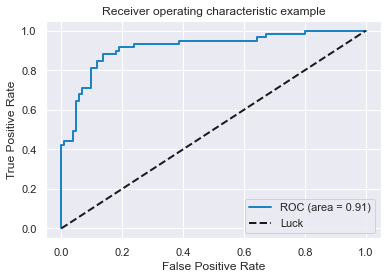

acc: 0.84375
prec: 0.8148148148148148
rec: 0.7457627118644068
Classification report - GradientBoostingClassifier:
Success ratio: 82.34%
              precision    recall  f1-score   support

       False       0.86      0.90      0.88       101
        True       0.81      0.75      0.78        59

    accuracy                           0.84       160
   macro avg       0.84      0.82      0.83       160
weighted avg       0.84      0.84      0.84       160

Confusion matrix: 
[[91 10]
 [15 44]]


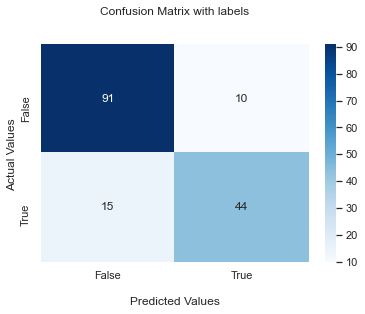

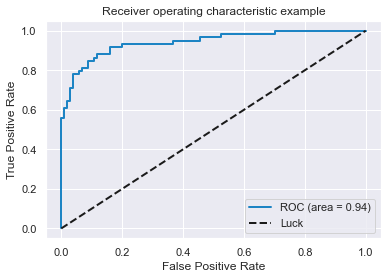

acc: 0.8875
prec: 0.9019607843137255
rec: 0.7796610169491526
Classification report - GradientBoostingClassifier:
Success ratio: 86.51%
              precision    recall  f1-score   support

       False       0.88      0.95      0.91       101
        True       0.90      0.78      0.84        59

    accuracy                           0.89       160
   macro avg       0.89      0.87      0.88       160
weighted avg       0.89      0.89      0.89       160

Confusion matrix: 
[[96  5]
 [13 46]]


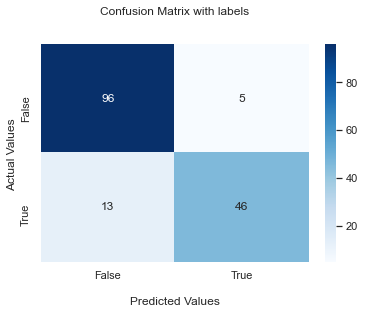

 
CV = 1



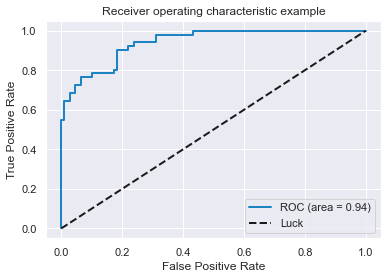

acc: 0.875
prec: 0.8444444444444444
rec: 0.7450980392156863
Classification report - GradientBoostingClassifier:
Success ratio: 84.04%
              precision    recall  f1-score   support

       False       0.89      0.94      0.91       109
        True       0.84      0.75      0.79        51

    accuracy                           0.88       160
   macro avg       0.87      0.84      0.85       160
weighted avg       0.87      0.88      0.87       160

Confusion matrix: 
[[102   7]
 [ 13  38]]


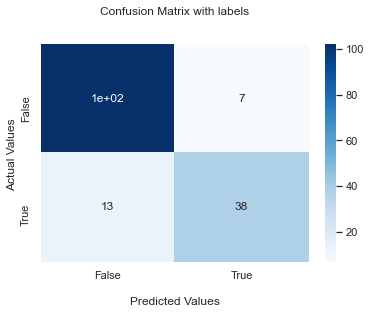

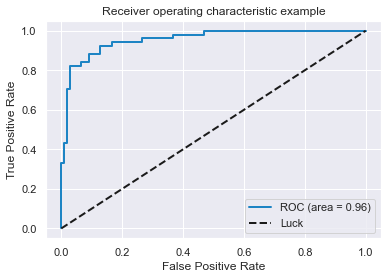

acc: 0.91875
prec: 0.9318181818181818
rec: 0.803921568627451
Classification report - GradientBoostingClassifier:
Success ratio: 88.82%
              precision    recall  f1-score   support

       False       0.91      0.97      0.94       109
        True       0.93      0.80      0.86        51

    accuracy                           0.92       160
   macro avg       0.92      0.89      0.90       160
weighted avg       0.92      0.92      0.92       160

Confusion matrix: 
[[106   3]
 [ 10  41]]


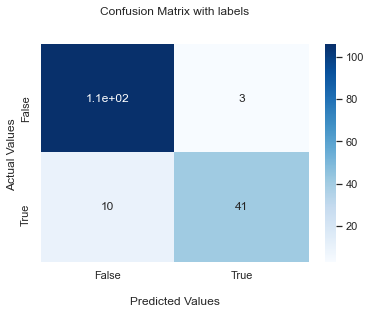

 
CV = 2



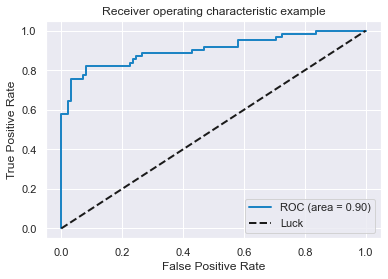

acc: 0.86875
prec: 0.8727272727272727
rec: 0.7741935483870968
Classification report - GradientBoostingClassifier:
Success ratio: 85.14%
              precision    recall  f1-score   support

       False       0.87      0.93      0.90        98
        True       0.87      0.77      0.82        62

    accuracy                           0.87       160
   macro avg       0.87      0.85      0.86       160
weighted avg       0.87      0.87      0.87       160

Confusion matrix: 
[[91  7]
 [14 48]]


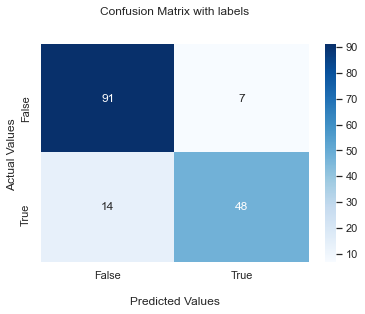

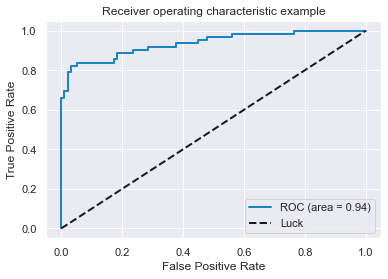

acc: 0.90625
prec: 0.9272727272727272
rec: 0.8225806451612904
Classification report - GradientBoostingClassifier:
Success ratio: 89.09%
              precision    recall  f1-score   support

       False       0.90      0.96      0.93        98
        True       0.93      0.82      0.87        62

    accuracy                           0.91       160
   macro avg       0.91      0.89      0.90       160
weighted avg       0.91      0.91      0.91       160

Confusion matrix: 
[[94  4]
 [11 51]]


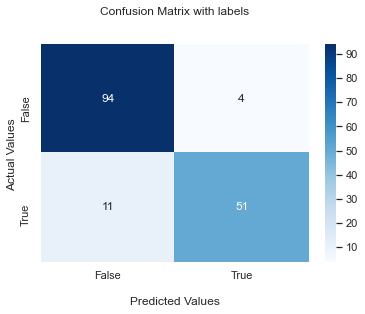

 
CV = 3



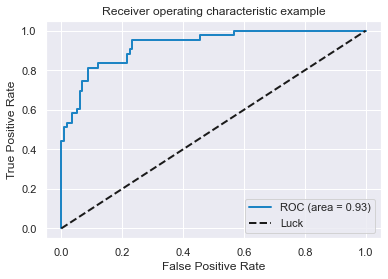

acc: 0.8742138364779874
prec: 0.7804878048780488
rec: 0.7441860465116279
Classification report - GradientBoostingClassifier:
Success ratio: 83.33%
              precision    recall  f1-score   support

       False       0.91      0.92      0.91       116
        True       0.78      0.74      0.76        43

    accuracy                           0.87       159
   macro avg       0.84      0.83      0.84       159
weighted avg       0.87      0.87      0.87       159

Confusion matrix: 
[[107   9]
 [ 11  32]]


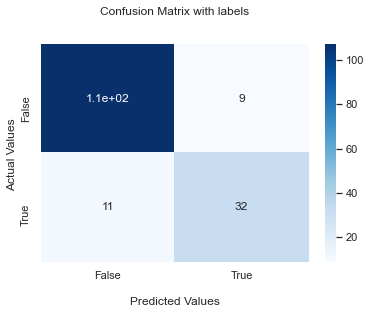

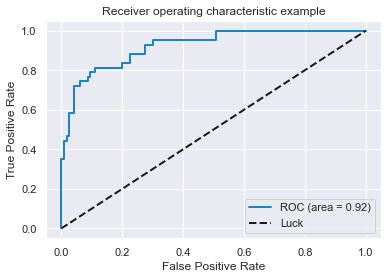

acc: 0.8742138364779874
prec: 0.7674418604651163
rec: 0.7674418604651163
Classification report - GradientBoostingClassifier:
Success ratio: 84.06%
              precision    recall  f1-score   support

       False       0.91      0.91      0.91       116
        True       0.77      0.77      0.77        43

    accuracy                           0.87       159
   macro avg       0.84      0.84      0.84       159
weighted avg       0.87      0.87      0.87       159

Confusion matrix: 
[[106  10]
 [ 10  33]]


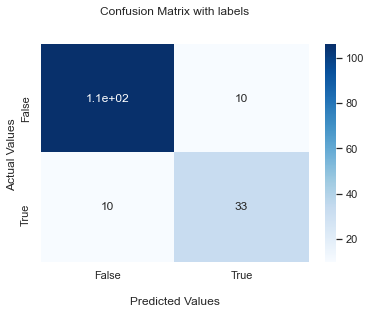

 
CV = 4



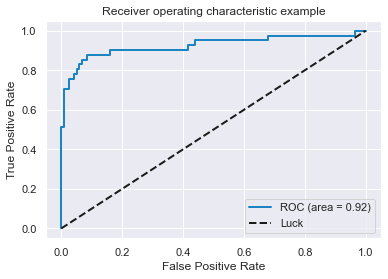

acc: 0.9119496855345912
prec: 0.8857142857142857
rec: 0.7560975609756098
Classification report - GradientBoostingClassifier:
Success ratio: 86.11%
              precision    recall  f1-score   support

       False       0.92      0.97      0.94       118
        True       0.89      0.76      0.82        41

    accuracy                           0.91       159
   macro avg       0.90      0.86      0.88       159
weighted avg       0.91      0.91      0.91       159

Confusion matrix: 
[[114   4]
 [ 10  31]]


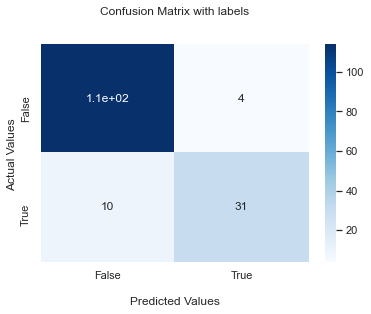

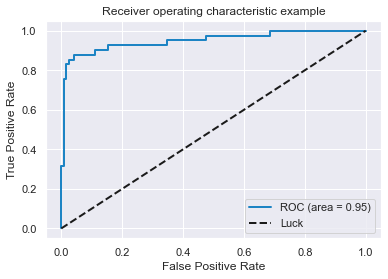

acc: 0.9371069182389937
prec: 0.9428571428571428
rec: 0.8048780487804879
Classification report - GradientBoostingClassifier:
Success ratio: 89.40%
              precision    recall  f1-score   support

       False       0.94      0.98      0.96       118
        True       0.94      0.80      0.87        41

    accuracy                           0.94       159
   macro avg       0.94      0.89      0.91       159
weighted avg       0.94      0.94      0.94       159

Confusion matrix: 
[[116   2]
 [  8  33]]


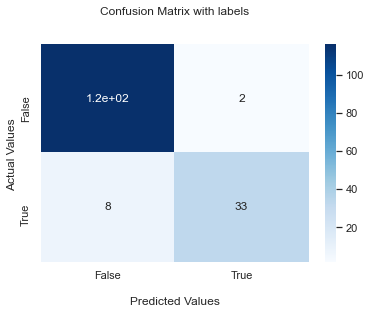

In [237]:
# Build a forest and compute the feature importances
text_export = []
success_ratio = {}
acc_results = {}
prec_results = {}
rec_results = {}
roc_results = {}


for clf in classifiers:
    success_ratio[clf] = list()
    acc_results[clf] = list()
    prec_results[clf] = list()
    rec_results[clf] = list()
    roc_results[clf] = list()

for i in range(k):
    print("CV = " + str(i) + "\n")
    
    for clf in classifiers:
        classifier_name = str(clf.__class__.__name__)                
        probabilities = clf.fit(X_train[i], y_train[i]).predict_proba(X_test[i])     
        predicted = clf.predict(X_test[i])
        
        fpr, tpr, _ = roc_curve(y_test[i], probabilities[:, 1]) 
        roc_auc = auc(fpr, tpr)
        
        # plot ROC
        plt.plot(fpr, tpr, lw=2, label='ROC (area = %0.2f)' % (roc_auc))
        plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', 
                 label='Luck')                

        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()
                        
        report = classification_report(y_true = y_test[i], y_pred = predicted)                
        precision, recall, fscore, support = score(y_true = y_test[i], y_pred = predicted)
        
        acc = accuracy_score(y_true = y_test[i], y_pred = predicted)
        prec = precision_score(y_true = y_test[i], y_pred = predicted)
        rec = recall_score(y_true = y_test[i], y_pred = predicted)
        
        print("acc:", acc)
        print("prec:", prec)
        print("rec:", rec)

        a = recall[0]
        b = recall[1]
        c = support[0]
        d = support[1]

        success_ratio[clf].append((a + b) / 2 * 100) # (recall false + recall true) / 2
        acc_results[clf].append(acc)
        prec_results[clf].append(prec)
        rec_results[clf].append(rec)
        roc_results[clf].append(roc_auc)

        print('Classification report - ' + classifier_name + ':')
        print('Success ratio: %.2f%%' % success_ratio[clf][i])
        print(report)
        print('Confusion matrix: ')
        cf_matrix = confusion_matrix(y_test[i], predicted)
        print(cf_matrix)

        ax = sns.heatmap(cf_matrix, annot=True,cmap='Blues')
        ax.set_title('Confusion Matrix with labels\n\n')
        ax.set_xlabel('\nPredicted Values')
        ax.set_ylabel('Actual Values ')
        ax.xaxis.set_ticklabels(['False','True'])
        ax.yaxis.set_ticklabels(['False','True'])

        # Display the visualization of the Confusion Matrix.
        plt.show()
        print(' ')

In [238]:
for clf in classifiers:
    print(str(clf))
    print(str(round(mean(success_ratio[clf]),2)) + " %")
    print(str(round(mean(acc_results[clf]),2)))
    print(str(round(mean(prec_results[clf]),2)))
    print(str(round(mean(rec_results[clf]),2)))
    print(str(round(mean(roc_results[clf]),2)))
    print()

GradientBoostingClassifier()
84.19 %
0.87
0.84
0.75
0.92

GradientBoostingClassifier(learning_rate=0.5, min_samples_leaf=10,
                           min_samples_split=5, n_estimators=200)
87.57 %
0.9
0.89
0.8
0.94

